<a href="https://colab.research.google.com/github/michaelyg18/528-Fall-Detection/blob/main/528_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from google.colab import drive
drive.mount('/content/gdrive')

df  = pd.read_csv("gdrive/My Drive/528_rows_2.csv")
#528_rows_2 must be in the root folder of your google drive.
df.head(5)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,aX,id,aY,aZ,gX,gY,gZ,t(s)
0,0.703895,1,-0.706289,8.47068,0.614329,0.545582,-0.537854,0.000000
1,0.363919,1,-0.718260,8.59279,0.021983,0.103521,-0.047564,0.016052
2,-0.074220,1,-0.679953,8.84657,0.027579,0.090064,-0.042234,0.032044
3,-0.323217,1,-0.536301,8.99262,0.029711,0.073277,-0.033441,0.049011
4,-0.316035,1,-0.435745,8.86573,0.027845,0.057956,-0.049162,0.064026


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X = df[['aX', 'aY', 'aZ', 'gX', 'gY', 'gZ']]
y = df['id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_selection = KNeighborsClassifier()
#print(KNeighborsClassifier().get_params().keys())
model_selection.fit(X_train, y_train)
predictions = model_selection.predict(X_test)
#print(predictions)
#plt.scatter(predictions, y_train)


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=1))
])


pred1 = pipe.fit(X_train, y_train).predict(X_test)
print(pred1)
#y_train = np.arange(0,len(y_train),1)


[4 4 2 ... 4 2 1]


In [44]:
from sklearn.model_selection import GridSearchCV
print(KNeighborsClassifier().get_params().keys())
print(y_train)
print(len(np.unique(y_train)))

mod = GridSearchCV(estimator = pipe,
                   param_grid={
                       'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   },
                   cv = 2)
y_pred = mod.fit(X_train, y_train)
best_params = mod.best_params_
best_mod = mod.best_estimator_
y_pred = best_mod.fit(X_train, y_train).predict(X_test)
pd.DataFrame(mod.cv_results_)

#plt.figure(figsize=(8, 6))
#plt.scatter(y_pred, y_test)
#plt.show()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
648      2
13729    1
47793    2
16657    2
1392     3
        ..
11284    1
44732    4
38158    3
860      3
15795    1
Name: id, Length: 40744, dtype: int64
4


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.041793,0.001103,1.823627,0.321180,1,{'model__n_neighbors': 1},0.858924,0.854015,0.856470,0.002454,1
1,0.030074,0.004857,1.666225,0.113172,2,{'model__n_neighbors': 2},0.826870,0.821323,0.824097,0.002773,2
2,0.026799,0.001930,1.655686,0.014808,3,{'model__n_neighbors': 3},0.825594,0.817151,0.821372,0.004221,3
3,0.024677,0.000043,1.965031,0.174304,4,{'model__n_neighbors': 4},0.820636,0.813960,0.817298,0.003338,4
4,0.040208,0.000144,2.174870,0.498868,5,{'model__n_neighbors': 5},0.816709,0.813175,0.814942,0.001767,5
5,0.024741,0.000094,1.852987,0.042571,6,{'model__n_neighbors': 6},0.811015,0.805763,0.808389,0.002626,6
6,0.025258,0.000388,1.807547,0.050774,7,{'model__n_neighbors': 7},0.809641,0.801983,0.805812,0.003829,7
7,0.036701,0.012130,2.438917,0.256748,8,{'model__n_neighbors': 8},0.807039,0.798400,0.802719,0.004320,8
8,0.033356,0.008152,2.026243,0.077095,9,{'model__n_neighbors': 9},0.803848,0.796534,0.800191,0.003657,9
9,0.025755,0.000811,1.962169,0.009132,10,{'model__n_neighbors': 10},0.801541,0.794129,0.797835,0.003706,10


In [46]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9029059493422344


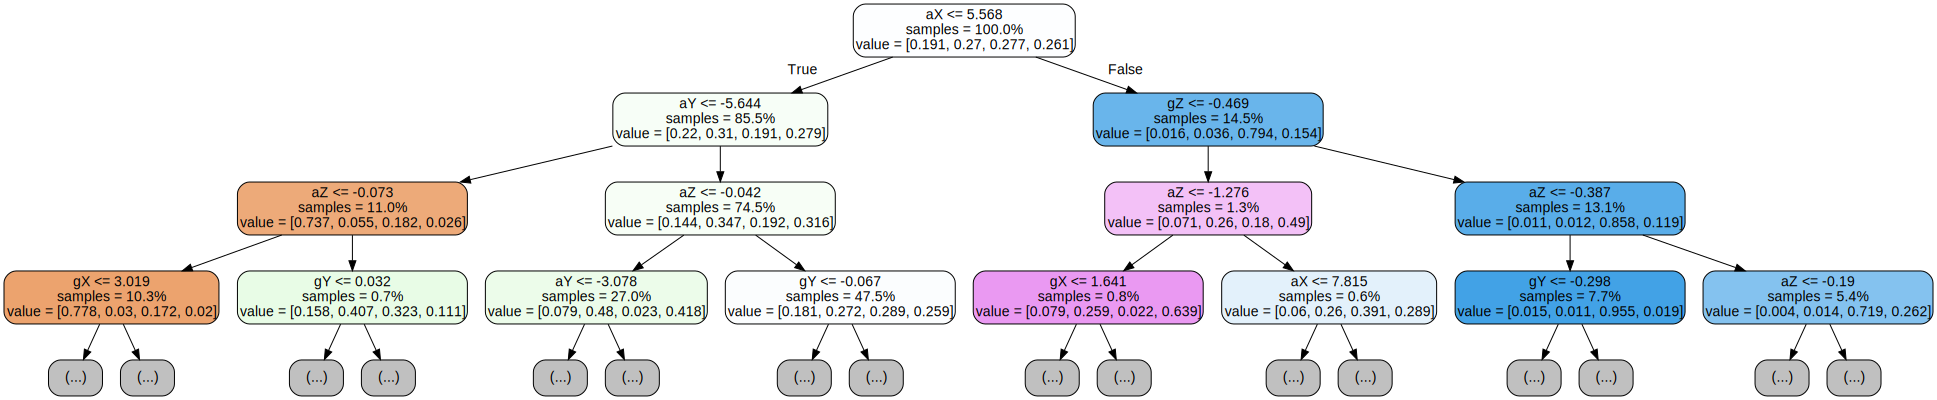

In [51]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
  tree = rf.estimators_[i]
  dot_data = export_graphviz(
      tree, feature_names=X.columns,
      filled=True, rounded=True,
      impurity=False, proportion=True,
      max_depth=3
  )
graph = graphviz.Source(dot_data)
display(graph)

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#print(RandomForestClassifier().get_params().keys())

rf2 = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf2,
                                 param_distributions = {'n_estimators': randint(50,500),
                                                        'max_depth': randint(1,20)},
                                 n_iter=5, cv=2)
y_pred = rand_search.fit(X_train, y_train)
best_params = rand_search.best_params_
best_mod = rand_search.best_estimator_
y_pred = best_mod.fit(X_train, y_train).predict(X_test)
pd.DataFrame(rand_search.cv_results_)
print(accuracy_score(y_test, y_pred))
'''
tuned = rand_search.best_params_
best_mod = rand_search.best_estimator_
y_pred = best_mod.fit(X_train, y_train).predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)'''


0.8679560180640095


'\ntuned = rand_search.best_params_\nbest_mod = rand_search.best_estimator_\ny_pred = best_mod.fit(X_train, y_train).predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint(accuracy)'